##Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: FTDS Batch006

###Problem

1. Salah satu ruang lingkup Natural Language Processing (NLP) adalah mengukur kesamaan konteks antar kalimat. Untuk mengetahui dua kalimat memiliki konteks yang sama atau tidak, kita mengukurnya dengan cosine similarity. Cosine similarity sejatinya mengukur 'jarak' antar dua vektor yang mana vektor-vektor tersebut berisikan angka-angka, sehingga kita perlu menerjemahkan kalimat menjadi list angka (encoding). Ada banyak metode encoding yang dapat digunakan untuk menerjemahkan kaliamat ke angka, salah satunya adalah dengan menghitung frekuensi kemunculan kata pada setiap kalimat.

Detail soal bisa dilihat [disini](https://github.com/H8-Assignments-Bay/ftds006---live-code-2-sivi-shahab)

Kalimat 1: Julie loves me more than Linda loves me

Kalimat 2: Jane likes me more than Julie loves me

Buatlah vektor yang merupakan representasi masing-masing kalimat berdasarkan tabel di atas dan hitung cosine similarity antar kedua vektor. Apakah kedua kalimat memiliki konteks yang serupa? jika iya, mengapa dan jika tidak, mengapa (jawab berdasarkan hasil perhitungan cosine similaritynya)?

###Load Library

In [12]:
# import library yang akan dibutuhkan
import pandas as pd
import numpy as np
import sympy as sy
import matplotlib.pyplot as plt
from numpy import linalg as LA

Vektor represntasi dari Kalimat 1 dan Kalimat 2 adalah sebagai berikut:

In [3]:
kalimat_1 = np.array([2, 0, 1, 1, 0, 2, 1, 1])
kalimat_1

array([2, 0, 1, 1, 0, 2, 1, 1])

In [4]:
kalimat_2 = np.array([2, 1, 1, 0, 1, 1, 1, 1])
kalimat_2

array([2, 1, 1, 0, 1, 1, 1, 1])

Penjelasan tentang Cosine similaity bisa di cek disini https://en.wikipedia.org/wiki/Cosine_similarity

Sehingga dari definisi diatas kita bisa tulis kedalam persamaan dibawah ini:

In [20]:
AdotB = kalimat_1.dot(kalimat_2)
AdotB

9

In [21]:
kalimat_1@kalimat_2

9

In [22]:
normA = LA.norm(kalimat_1)
normA

3.4641016151377544

In [23]:
np.linalg.norm(kalimat_1)

3.4641016151377544

In [24]:
normB = LA.norm(kalimat_2)
normB

3.1622776601683795

In [27]:
np.linalg.norm(kalimat_2)

3.1622776601683795

In [30]:
# Mencari sudut theta dengan menggunakan formula berikut ini

cosine_similarity =  AdotB/(normA*normB)
cosine_similarity

0.8215838362577491

In [31]:
cosine_similarity=(kalimat_1@kalimat_2)/(np.linalg.norm(kalimat_1)*np.linalg.norm(kalimat_2))
print(cosine_similarity)

0.8215838362577491


Untuk pencococokan teks, vektor atribut Kalimat 1 dan Kalimat 2 biasanya merupakan vektor frekuensi istilah dari dokumen. Kemiripan kosinus dapat dilihat sebagai metode normalisasi panjang dokumen sebagai perbandingan

Dalam hal pencarian informasi, kesamaan kosinus dari dua dokumen akan berkisar dari 0 hingga 1, karena istilah frekuensi tidak boleh negatif. Dengan 0 menunjukkan ketidakmiripan, sedangakan nilai diantara 0 hingga 1 kesamaaan atau ketidakmiripan (biasanya kurang dari sama dengan 0.5 kurang mirip, dan lebih dari 0.5 cukup mirip/ahampir mirip) dan 1 yang berarti sama persis.

Berdasarkan dari hasil perhitungan cosine similarity diperoleh nilai **82%** dapat dikatakan bahwa kedua kalimat memiliki konteks yang hampir serupa karena memiliki korelasi yang cukup kuat.

###Problem

2. Menggunakan konsep integral untuk menghitung luas dibawah kurva, tentukan luas negara Swiss jika diketahui koordinat batas-batasnya! Dataset koordinat batas Swiss dapat diakses pada link berikut: https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Swiss_boundaries.txt?token=AEZDEHXBTS7OMF32RTYPKZDA2FELA

#### Load Data

In [32]:
df = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/Swiss_boundaries.txt?token=AEZDEHXBTS7OMF32RTYPKZDA2FELA')
df.head()

,longitude,latitude
0,9.56672,47.54045
1,9.55980,47.50209
2,9.59660,47.46944
3,9.64965,47.45861
4,9.67035,47.39069


In [36]:
df_swiss = df.copy()

In [39]:
df_swiss.sort_values(by='longitude', ascending=True, inplace=True)

In [40]:
df_swiss.head()

,longitude,latitude
169,5.96701,46.20729
170,5.98139,46.22194
168,5.99639,46.14694
171,6.00917,46.23389
172,6.03000,46.24139


In [42]:
index = []
for j in range(len(df_swiss['longitude'])):
  index.append(j)
  

In [53]:
df_swiss_sort = pd.DataFrame(({'index': index,
                   'longitude': df_swiss['longitude'],
                   'latitude': df_swiss['latitude']}))
df_swiss_sort.head()

,index,longitude,latitude
169,0,5.96701,46.20729
170,1,5.98139,46.22194
168,2,5.99639,46.14694
171,3,6.00917,46.23389
172,4,6.03000,46.24139


In [54]:
df_swiss_sort.set_index('index', inplace=True)
df_swiss_sort.head()

,longitude,latitude
index,,
0,5.96701,46.20729
1,5.98139,46.22194
2,5.99639,46.14694
3,6.00917,46.23389
4,6.03000,46.24139


**Hint dan Note:**

Longitude adalah sumbu x dan latitude adalah sumbu y nya.
Wilayah Swiss dapat dibagi menjadi dua bagian yaitu Northern dan Southern (dapat menggunakan acuan nilai tengah latitude dimana nilai maksimum ditambah nilai minimum lalu dibagi dua. Di atas nilai tengah northern dan di bawah nilai tengah southern) supaya mempermudah dalam menghitung Integral
Tidak perlu memperhatikan satuan


In [56]:
x = df_swiss_sort['longitude']
y = df_swiss_sort['latitude']

In [57]:
print(x.shape)
print(y.shape)

(278,)
(278,)


In [58]:
#convert pandas to numpy array
np_x = x.to_numpy()
np_y = y.to_numpy()

In [60]:
max_y = np.amax(np_y)
print(max_y)
min_y = np.amin(np_y)
print(min_y)

47.80666000000008
45.82944000000003


In [61]:
nilai_tengah_y = (max_y+min_y)/2
print(nilai_tengah_y)

46.818050000000056


In [62]:
index_northern=[]
index_southern=[]
for i in range(len(x)):
  if y[i] > nilai_tengah_y:
    index_northern.append(i)
  else:
    index_southern.append(i)


In [63]:
print("index northern: ", index_northern)
print('--'*100)
print("index southern: ", index_southern)

index northern:  [27, 29, 32, 33, 34, 36, 37, 41, 45, 46, 48, 49, 51, 52, 53, 54, 56, 61, 62, 65, 66, 68, 70, 71, 72, 73, 75, 77, 78, 80, 81, 82, 83, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95, 98, 104, 108, 109, 113, 114, 115, 119, 120, 121, 123, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 145, 146, 147, 150, 152, 153, 155, 156, 157, 158, 162, 165, 166, 168, 169, 172, 174, 177, 180, 184, 192, 202, 203, 204, 205, 206, 207, 208, 209, 210, 212, 213, 214, 216, 217, 218, 220, 221, 222, 224, 225, 226, 227, 229, 233, 234, 235, 236, 238, 246, 249, 251, 253, 255, 258, 263, 264, 266, 267, 268, 273, 277]
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
index southern:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 30, 31, 35, 38, 39, 40, 42, 43, 44, 47, 50, 55, 57, 58,

In [64]:
y_north = y[index_northern]
y_north[0:5]

index
27    46.83944
29    46.89583
32    46.97167
33    46.98000
34    47.00000
Name: latitude, dtype: float64

In [65]:
y_south = y[index_southern]
y_south[0:5]

index
0    46.20729
1    46.22194
2    46.14694
3    46.23389
4    46.24139
Name: latitude, dtype: float64

In [66]:
x_north = x[index_northern]
x_north[0:5]

index
27    6.44694
29    6.46028
32    6.52833
33    6.56639
34    6.63250
Name: longitude, dtype: float64

In [67]:
x_south = x[index_southern]
x_south[0:5]

index
0    5.96701
1    5.98139
2    5.99639
3    6.00917
4    6.03000
Name: longitude, dtype: float64

####Luas Area Northern

In [68]:
# Load library untuk integral
from scipy.integrate import trapz

area_northen = trapz(y_north, x_north)
print(area_northen)


191.43515335300015


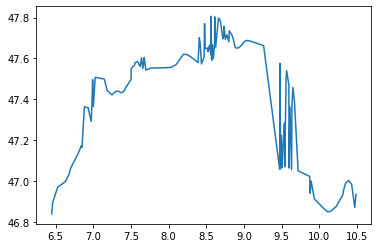

In [70]:
# Area Swiss bagian Northern
plt.plot(x_north,y_north)

####Luas Area Southern

In [69]:
area_sourth = trapz(y_south, x_south)
print(area_sourth)

208.95178418020032


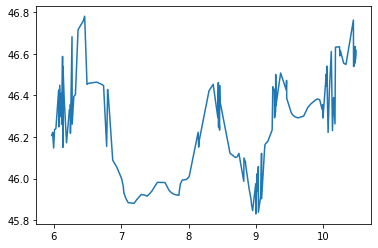

In [71]:
# Area Swiss bagian Northern

plt.plot(x_south,y_south)

Total Luas Wilayah Negara Swiss adalah:

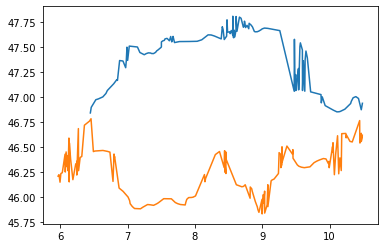

In [74]:
# Gambar Total Luas Wilayah Negara Swiss
plt.plot(x_north,y_north)
plt.plot(x_south,y_south)

In [72]:
luas_total = abs(area_northen - area_sourth)
luas_total

17.516630827200174

Jadi Total Luas Wilayah Negara Swiss adalah **17.516630827200174**

In [ ]:
# lat_center=(data.latitude.max()+data.latitude.min())/2
# lat_center


# data_reorder=data.sort_values('longitude',ascending=True)
# northern=data_reorder[data_reorder.latitude>=lat_center]
# southern=data_reorder[data_reorder.latitude<=lat_center]


# plt.plot(northern.longitude,northern.latitude)
# plt.plot(southern.longitude,southern.latitude)


# L_N=integrate.trapezoid(northern.latitude,northern.longitude)
# L_S=integrate.trapezoid(southern.latitude,southern.longitude)
# luas_swiss=L_N-L_S

# np.abs(luas_swiss)